<a href="https://colab.research.google.com/github/rahmanidashti/TF2Practices/blob/main/01_TF2Practice_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization in TF.2

`min(f(x)) w.r.t constraints`

## Learning procedure in TF.2
1. Defining learning model
2. Defning loss function
3. Loss function minimization

### Example



#### Definig learning model

In this example, we are going to create a `linear regression` model which is one of the fundamental supervised learning algorithms. In contrast to the classification problem in which the outputs are labels and **discrete**, the outputs in regression are continuous and it is about the prediction of quantity, not labels.

Linear regression:
$f(x_i) = w^T . x_i + b$




In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

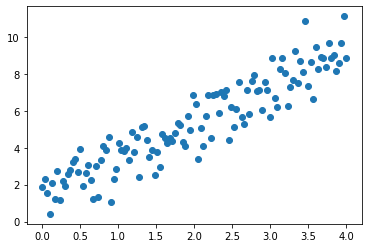

In [ ]:
# Dataset: random data

# The linspace(start, stop, num) function returns evenly spaced numbers over a specified interval [start, stop].
x = np.linspace(0, 4, 120)

# create a data around the line 2*x+0.9
y = 2 * x + 0.9 + np.random.randn(x.shape[0]) + 0.3

plt.scatter(x, y)
plt.show

In [ ]:
class Linearregmodel:
  # the constructor method sets W and b
  def __init__(self):
    self.Weight = tf.Variable(5.0)
    self.Bias = tf.Variable(6.0)
  # Using __call__ method we can call the class like a function
  def __call__(self, x):
    return self.Weight * x + self.Bias

#### Defining loss function

We need to define a loss function to optimize the model's parameter. Here, we consdier Mean Square Error (MSE) which is: $\frac{1}{n}\sum_{i=1}^{n}(y_i^t-y_i^p)^2$

In [ ]:
def loss(actual_values, predicted_values):
  # square: to the power of 2
  # reduce_mean: mean of values
  return tf.reduce_mean(tf.square(actual_values - predicted_values))

#### Loss function minimization

Gradient descent: $x_{n+1}=x_n - \eta\frac{\partial f}{\partial x}$ where $\eta$ is learning rate.

In [ ]:
def train(linear_model, x, y, learning_rate=0.12):
  with tf.GradientTape() as t:
    current_loss = loss(actual_values=y, predicted_values=linear_model(x))

  ''' we need to optimize our model parametrs which in this model wight and 
  bias are our model parametrs. So, we have to compute the gradient (derivations) 
  of our loss function into model parametrs.
  '''

  lr_weight, lr_bias = t.gradient(current_loss, [linear_model.Weight, linear_model.Bias])

  # update the weight and biase based on the new valeus of gradients
  linear_model.Weight.assign_sub(learning_rate * lr_weight)
  linear_model.Bias.assign_sub(learning_rate * lr_bias)

In [ ]:
linear_model = Linearregmodel()
epochs = 100
for epoch_count in range(epochs):
  real_loss = loss(actual_values=y, predicted_values=linear_model(x))
  train(linear_model, x, y, learning_rate=0.12)
  print(f"Epoch count = {epoch_count}, Loss value = {real_loss.numpy()}")

print(f"linear_model.Weight: {linear_model.Weight.numpy()}")
print(f"linear_model.Bias: {linear_model.Bias.numpy()}")

Epoch count = 0, Loss value = 126.83720397949219
Epoch count = 1, Loss value = 30.425928115844727
Epoch count = 2, Loss value = 8.766112327575684
Epoch count = 3, Loss value = 3.7991867065429688
Epoch count = 4, Loss value = 2.570418357849121
Epoch count = 5, Loss value = 2.1881070137023926
Epoch count = 6, Loss value = 2.005814552307129
Epoch count = 7, Loss value = 1.8781630992889404
Epoch count = 8, Loss value = 1.7716845273971558
Epoch count = 9, Loss value = 1.6779841184616089
Epoch count = 10, Loss value = 1.5943572521209717
Epoch count = 11, Loss value = 1.5194549560546875
Epoch count = 12, Loss value = 1.4523069858551025
Epoch count = 13, Loss value = 1.3920975923538208
Epoch count = 14, Loss value = 1.338106393814087
Epoch count = 15, Loss value = 1.2896908521652222
Epoch count = 16, Loss value = 1.2462750673294067
Epoch count = 17, Loss value = 1.207342505455017
Epoch count = 18, Loss value = 1.1724302768707275
Epoch count = 19, Loss value = 1.1411231756210327
Epoch count = 2